# VGG Net 응용하기



In [5]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [6]:
vgg = VGG16()
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
!unzip Animals.zip -d animals

Archive:  Animals.zip
  inflating: animals/cat1.jpg        
  inflating: animals/cat2.jpg        
  inflating: animals/cat3.jpg        
  inflating: animals/cat4.jpg        
  inflating: animals/eagle1.jpg      
  inflating: animals/eagle2.jpg      
  inflating: animals/eagle3.jpg      


In [8]:
!ls -l animals

total 224
-rw-r--r-- 1 root root 48364 Feb 17  2021 cat1.jpg
-rw-r--r-- 1 root root 16500 Feb 17  2021 cat2.jpg
-rw-r--r-- 1 root root 24736 Feb 17  2021 cat3.jpg
-rw-r--r-- 1 root root 80500 Feb 17  2021 cat4.jpg
-rw-r--r-- 1 root root 22187 Feb 17  2021 eagle1.jpg
-rw-r--r-- 1 root root  5508 Feb 17  2021 eagle2.jpg
-rw-r--r-- 1 root root 15867 Feb 17  2021 eagle3.jpg


In [9]:
import numpy as np
from PIL import Image

img = np.array(Image.open("animals/cat1.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

triceratops (31.97%)


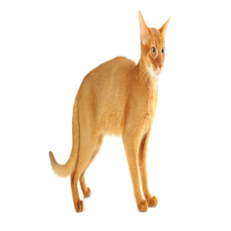

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)
plt.axis("off")
plt.show()

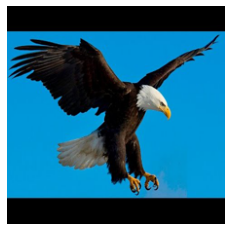

bald_eagle (52.02%)


In [11]:
img = np.array(Image.open("animals/eagle1.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
plt.imshow(img)
plt.axis("off")
plt.show()

print('%s (%.2f%%)' % (label[1], label[2]*100))

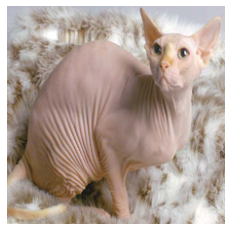

Egyptian_cat (97.04%)


In [12]:
img = np.array(Image.open("animals/cat3.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
plt.imshow(img)
plt.axis("off")
plt.show()

print('%s (%.2f%%)' % (label[1], label[2]*100))